In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
dataset = pd.read_csv('train.csv')
dataset = dataset.iloc[:,1:]

In [3]:
dataset.shape

(15120, 55)

In [4]:
pd.set_option('display.max_columns', None)
print dataset.describe()

          Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%            

In [14]:
dataset.skew()

Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6                              4.506716
Soil_Type7          

In [6]:
dataset['Cover_Type'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

In [7]:
# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore Wilderness_Area and Soil_Type as they are binary

# sets the number of features considered
size = 10
data = dataset.iloc[:, :size]
cols = data.columns

In [8]:
data_corr = data.corr()

In [9]:
threshold = 0.5
corr_list = []

for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index


In [10]:
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

for v,i,j in s_corr_list:
    print "%s and %s = %.2f" % (cols[i],cols[j],v)

Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58


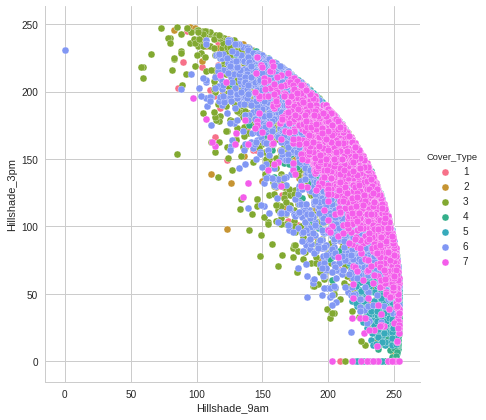

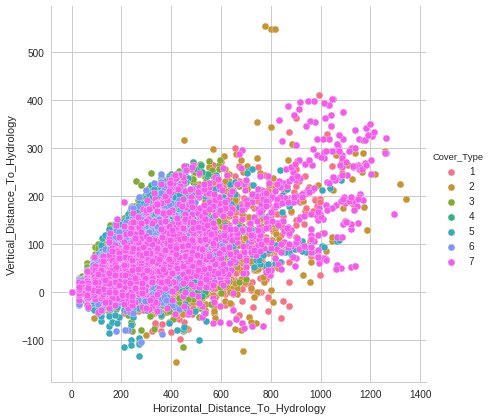

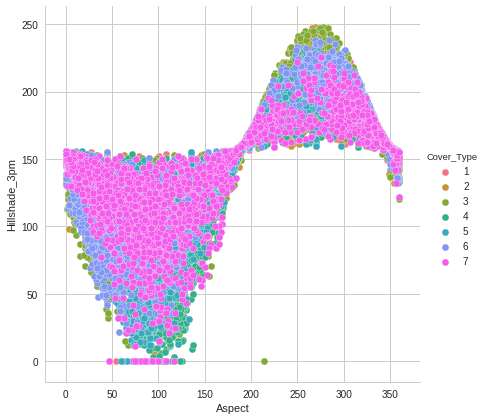

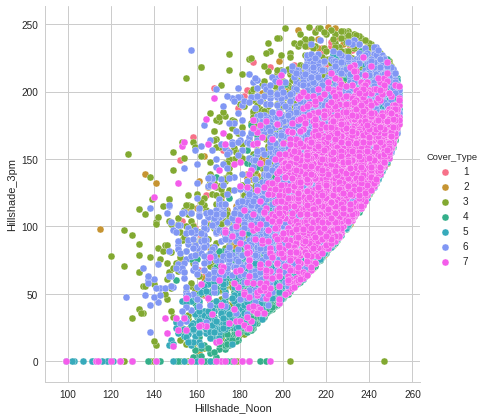

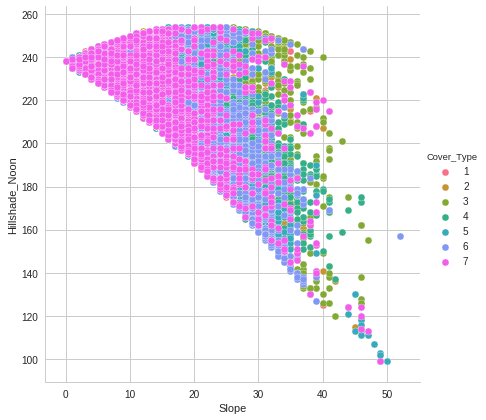

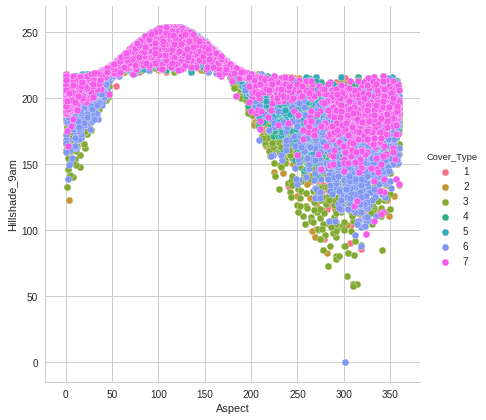

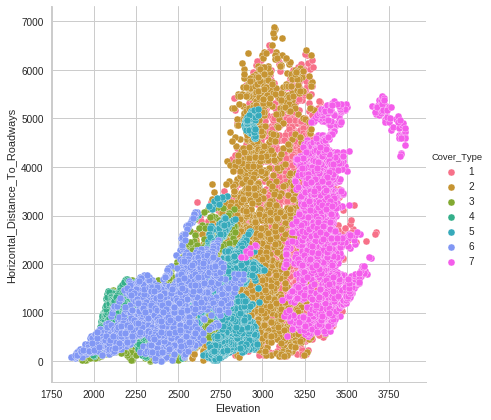

In [11]:
for v,i,j in s_corr_list:
    sns.pairplot(dataset, hue='Cover_Type', size=6, x_vars=cols[i], y_vars=cols[j])
    plt.show()

In [12]:
cols = dataset.columns

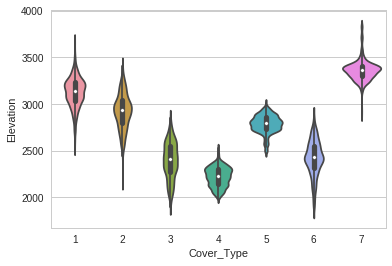

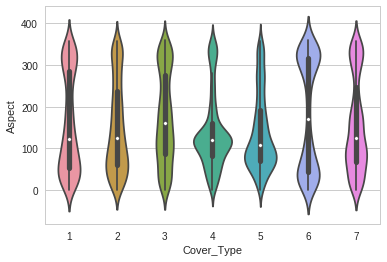

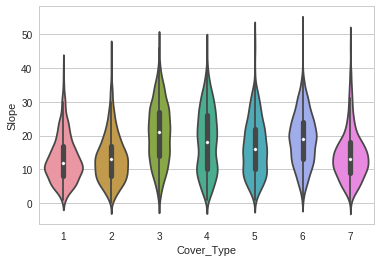

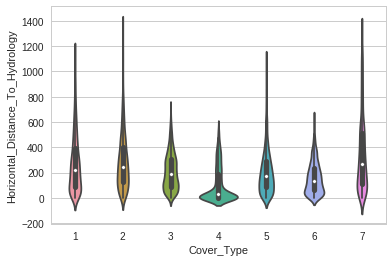

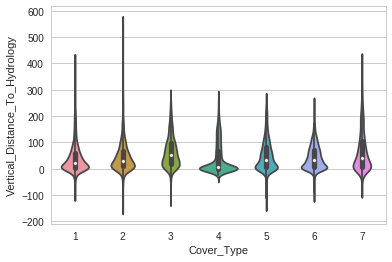

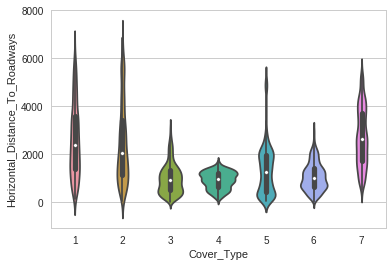

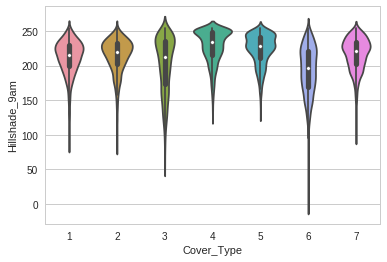

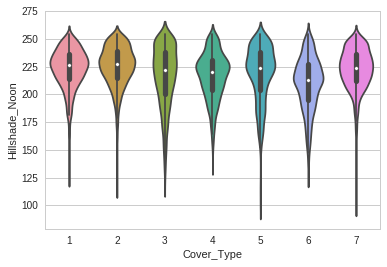

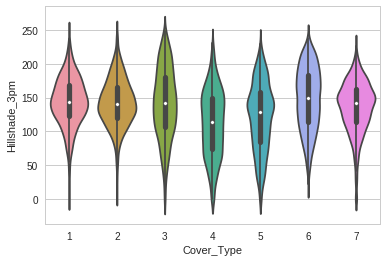

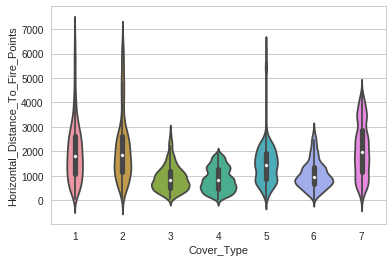

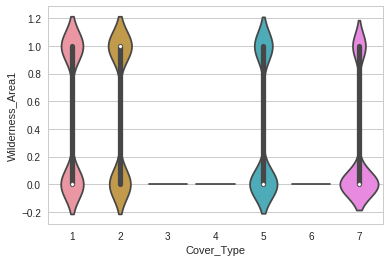

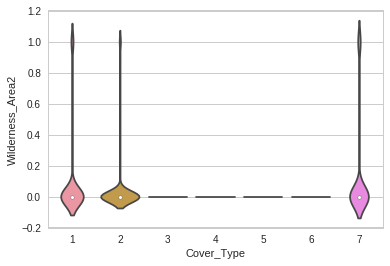

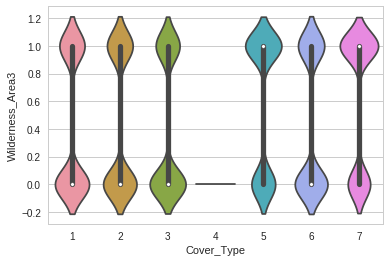

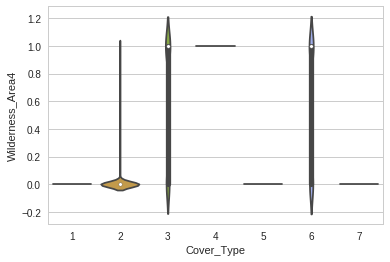

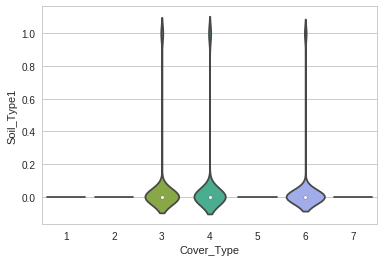

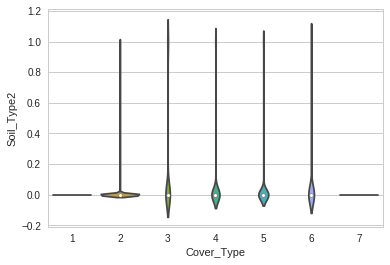

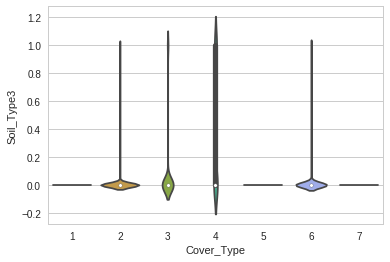

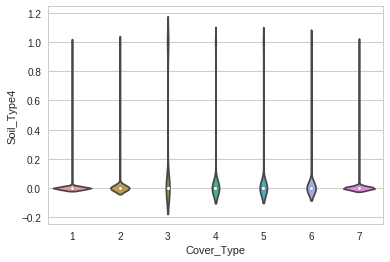

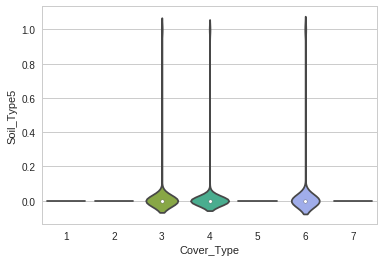

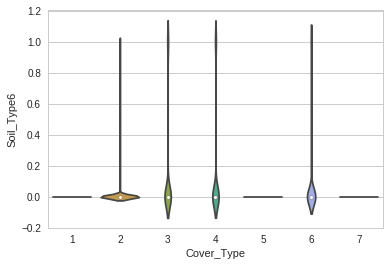

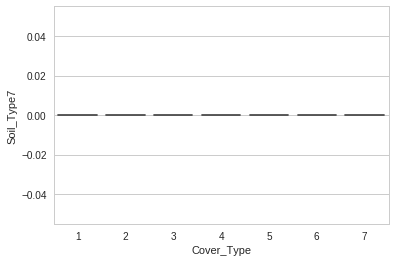

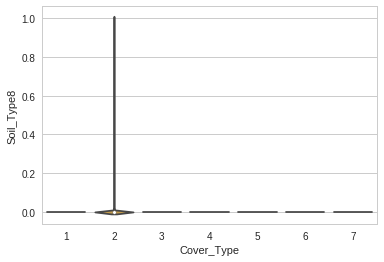

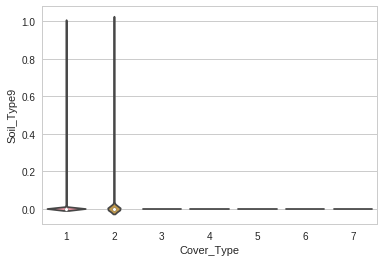

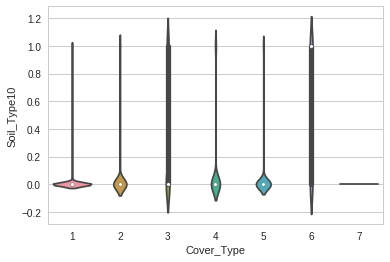

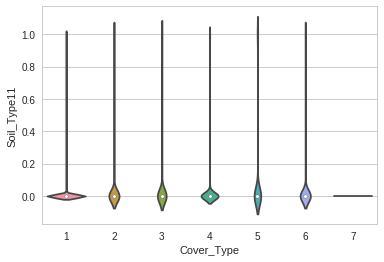

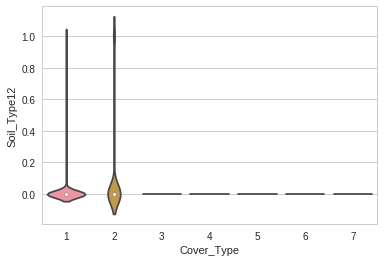

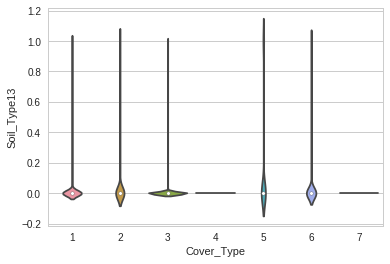

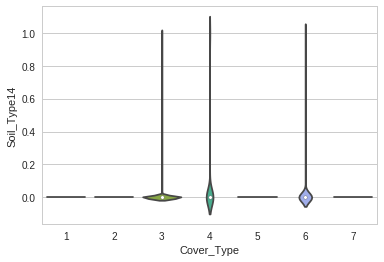

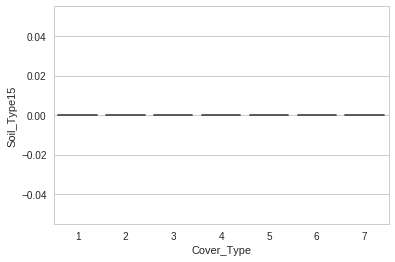

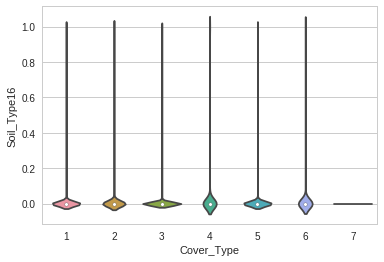

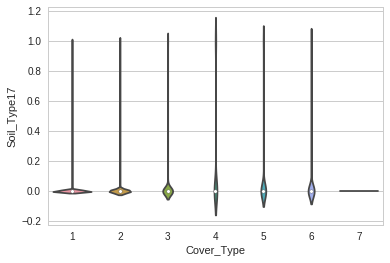

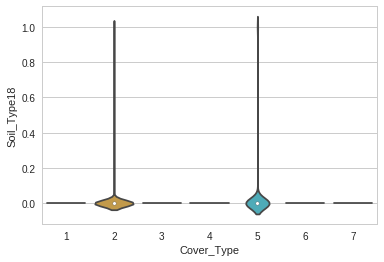

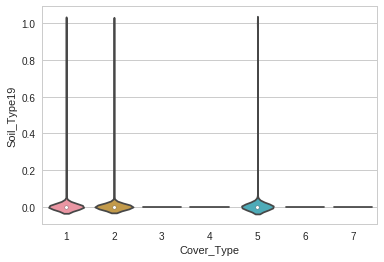

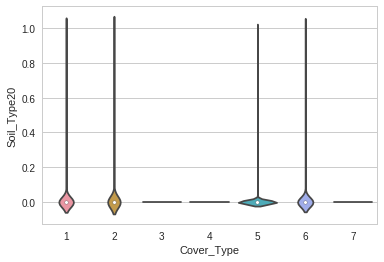

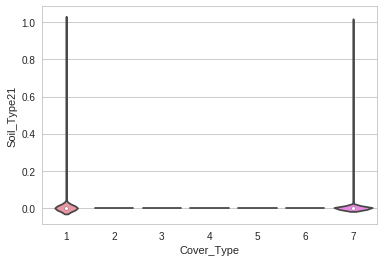

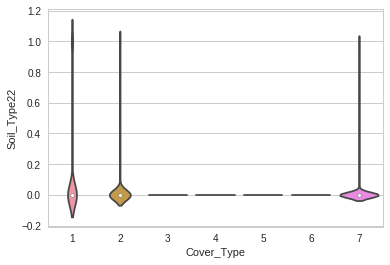

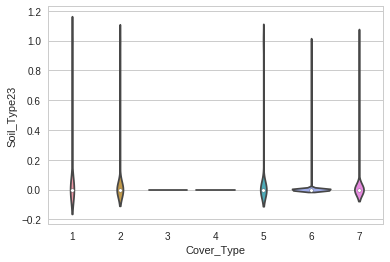

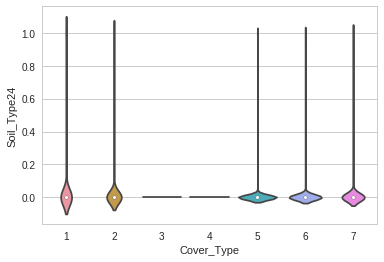

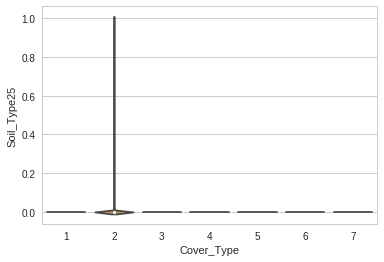

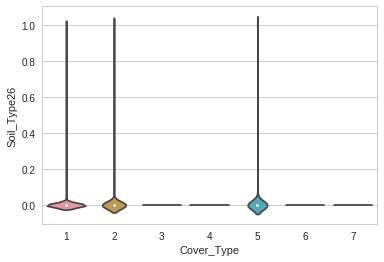

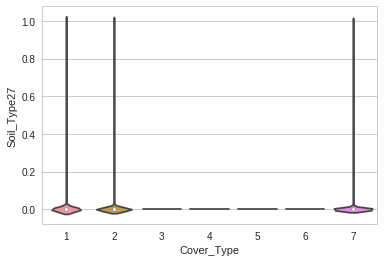

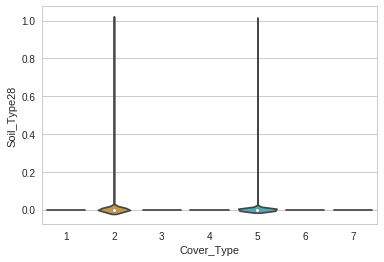

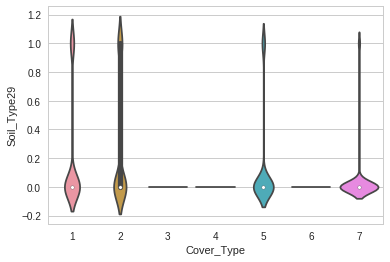

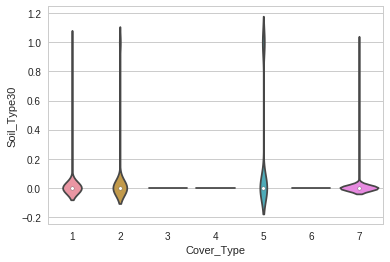

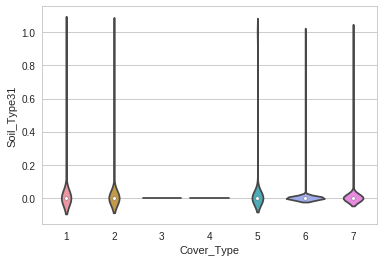

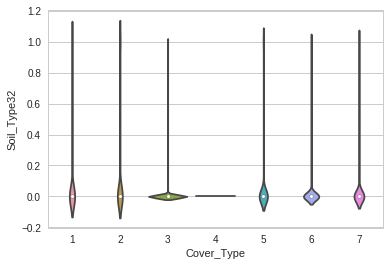

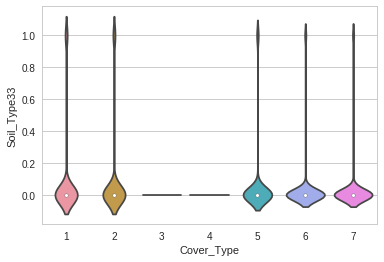

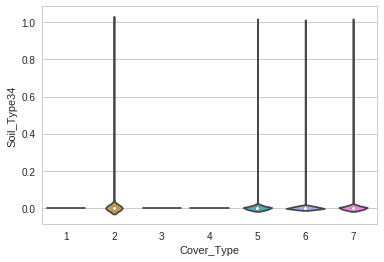

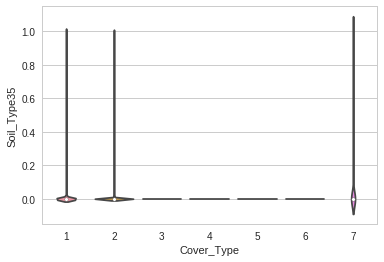

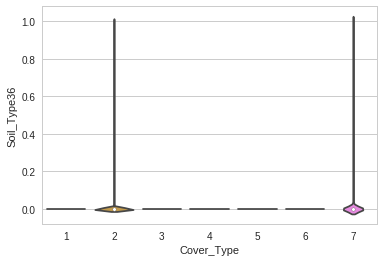

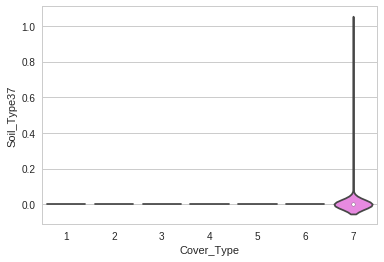

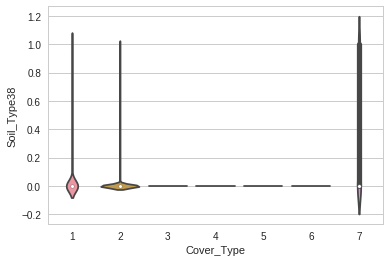

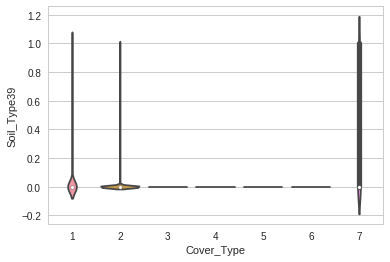

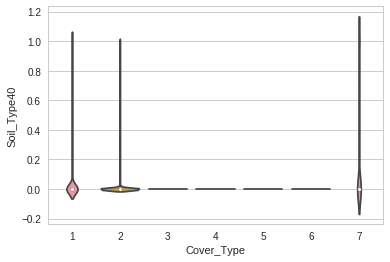

In [13]:
size = len(cols) - 1
x = cols[size]
y = cols[0:size]

for i in range(0, size):
    sns.violinplot(data=dataset, x=x, y=y[i])
    plt.show()


In [15]:
cols = dataset.columns
r, c = dataset.shape

data = pd.DataFrame(index=np.arange(0, r), columns=['Wilderness_Area','Soil_Type','Cover_Type'])

In [16]:
# Make an entry in 'data' for each r as category_id, target value
for i in range(0,r):
    w=0
    s=0
    # Category1 range
    for j in range(10,14):
        if (dataset.iloc[i,j] == 1):
            w = j - 9  # category class
            break
    # Category2 range        
    for k in range(14,54):
        if (dataset.iloc[i,k] == 1):
            s = k - 13 # category class
            break
    # Make an entry in 'data' for each r as category_id, target value        
    data.iloc[i]=[w,s,dataset.iloc[i,c-1]]

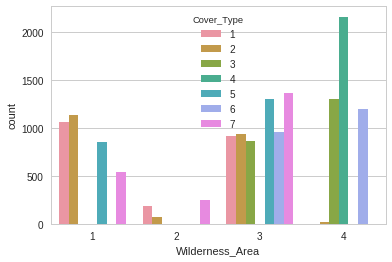

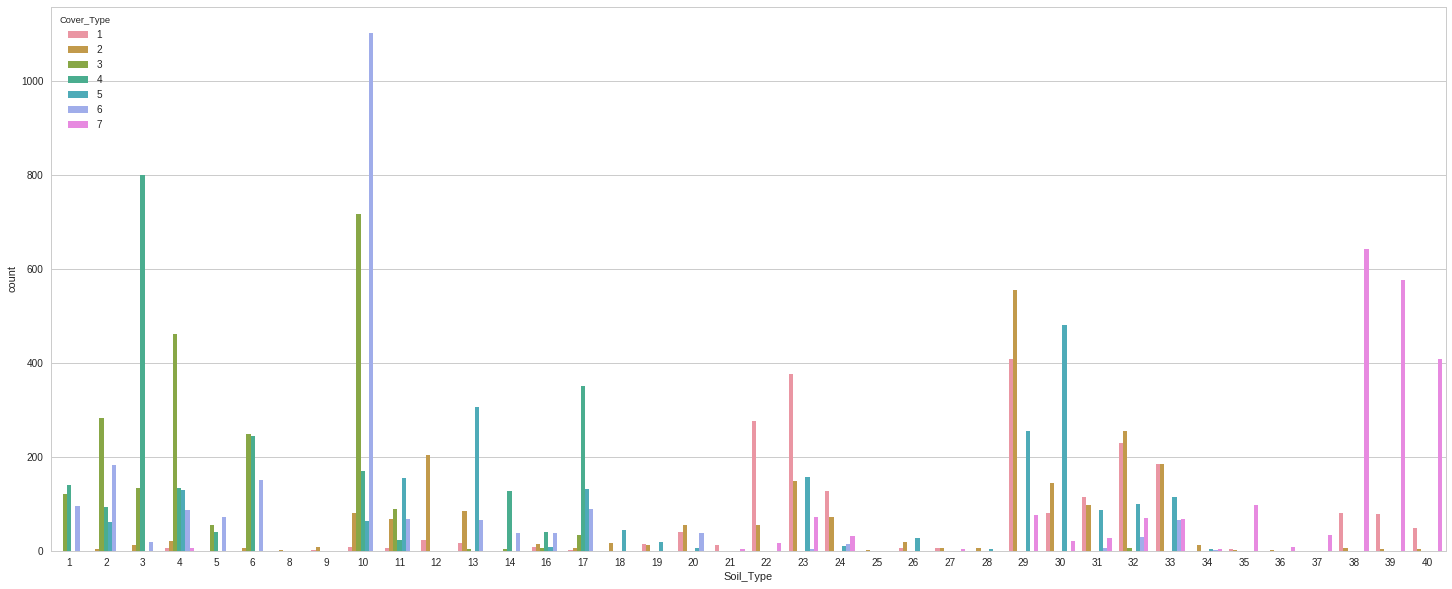

In [17]:
# Plot for Category1
sns.countplot(x="Wilderness_Area", hue="Cover_Type", data=data)
plt.show()
# Plot for Category2
plt.rc("figure", figsize=(25, 10))
sns.countplot(x="Soil_Type", hue="Cover_Type", data=data)
plt.show()

In [18]:
rem = []

for c in dataset.columns:
    if dataset[c].std() == 0:
        rem.append(c)

dataset.drop(rem, axis=1, inplace=True)


In [19]:
#get the number of rows and columns
r, c = dataset.shape

#get the list of columns
cols = dataset.columns
#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)
#array of importance rank of all features  
ranks = []

#Extract only the values
array = dataset.values

#Y is the target column, X has the rest
X = array[:,0:(c-1)]
Y = array[:,(c-1)]

#Validation chunk size
val_size = 0.1

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

In [24]:
from sklearn import cross_validation
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [26]:
#All features
X_all = []
#Additionally we will make a list of subsets
X_all_add =[]

#columns to be dropped
rem = []
#indexes of columns to be dropped
i_rem = []

#List of combinations
comb = []
comb.append("All+1.0")

#Add this version of X to the list 
X_all.append(['Orig','All', X_train,X_val,1.0,cols[:c-1],rem,ranks,i_cols,i_rem])

In [27]:
#point where categorical data begins
size=10

#Standardized
#Apply transform only for non-categorical data
X_temp = StandardScaler().fit_transform(X_train[:,0:size])
X_val_temp = StandardScaler().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['StdSca','All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [28]:
#MinMax
#Apply transform only for non-categorical data
X_temp = MinMaxScaler().fit_transform(X_train[:,0:size])
X_val_temp = MinMaxScaler().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['MinMax', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [29]:
#Normalize
#Apply transform only for non-categorical data
X_temp = Normalizer().fit_transform(X_train[:,0:size])
X_val_temp = Normalizer().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['Norm', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [30]:
trans_list = []

for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
    trans_list.append(trans)

In [31]:
ratio_list = [0.75,0.50,0.25]

feat = []
feat_list = []

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [32]:
n = 'ExTree'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n, val))
    feat.append([n,val,ExtraTreesClassifier(n_estimators=c-1, max_features=val, n_jobs=-1,
                random_state=seed)])

In [33]:
n = 'GraBst'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,GradientBoostingClassifier(n_estimators=c-1,max_features=val,
                                                  random_state=seed)])  

In [34]:
n = 'RndFst'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,RandomForestClassifier(n_estimators=c-1,max_features=val,n_jobs=-1,
                                              random_state=seed)]) 

In [35]:
n = 'XGB'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,XGBClassifier(n_estimators=c-1,seed=seed)]) 

In [36]:
for trans, s, X, X_val, d, cols, rem, ra, i_cols, i_rem in X_all:   
    for name, v, model in feat:
        model.fit(X,Y_train)   
        joined = []
        for i, pred in enumerate(list(model.feature_importances_)):
            joined.append([i,cols[i],pred])       
        joined_sorted = sorted(joined, key=lambda x: -x[2])
    
        rem_start = int((v*(c-1)))
        cols_list = []
        i_cols_list = []
        rank_list =[]
        rem_list = []
        i_rem_list = []

        for j, (i, col, x) in enumerate(list(joined_sorted)):
            rank_list.append([i,j])  
            # rank_list 的第一个元素是特征index, 第二个元素是这个特征的重要程度排行
            if(j < rem_start):
                cols_list.append(col)
                i_cols_list.append(i)            
            else:
                rem_list.append(col)
                i_rem_list.append(i)    
    
        X_all_add.append([trans,name,X,X_val,v,cols_list,rem_list,[x[1] for x in sorted(rank_list,key=lambda x:x[0])],i_cols_list,i_rem_list])    

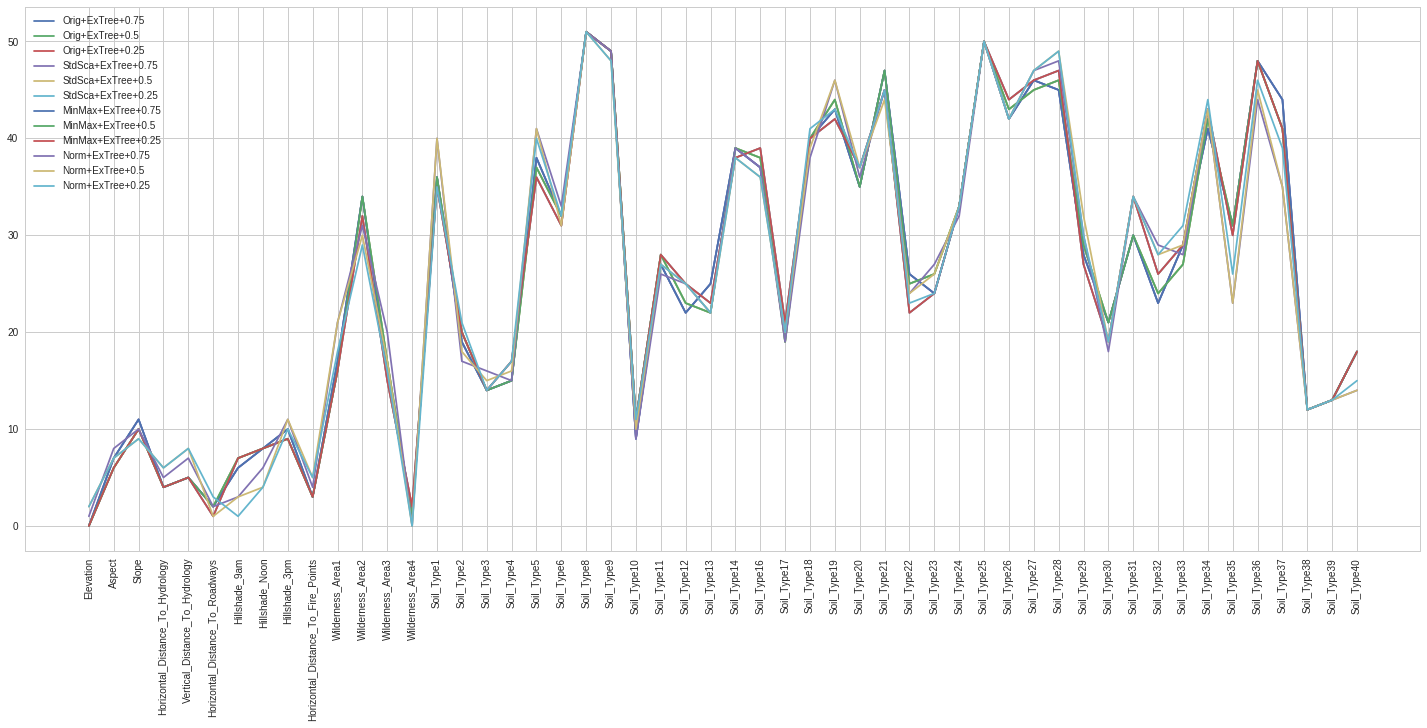

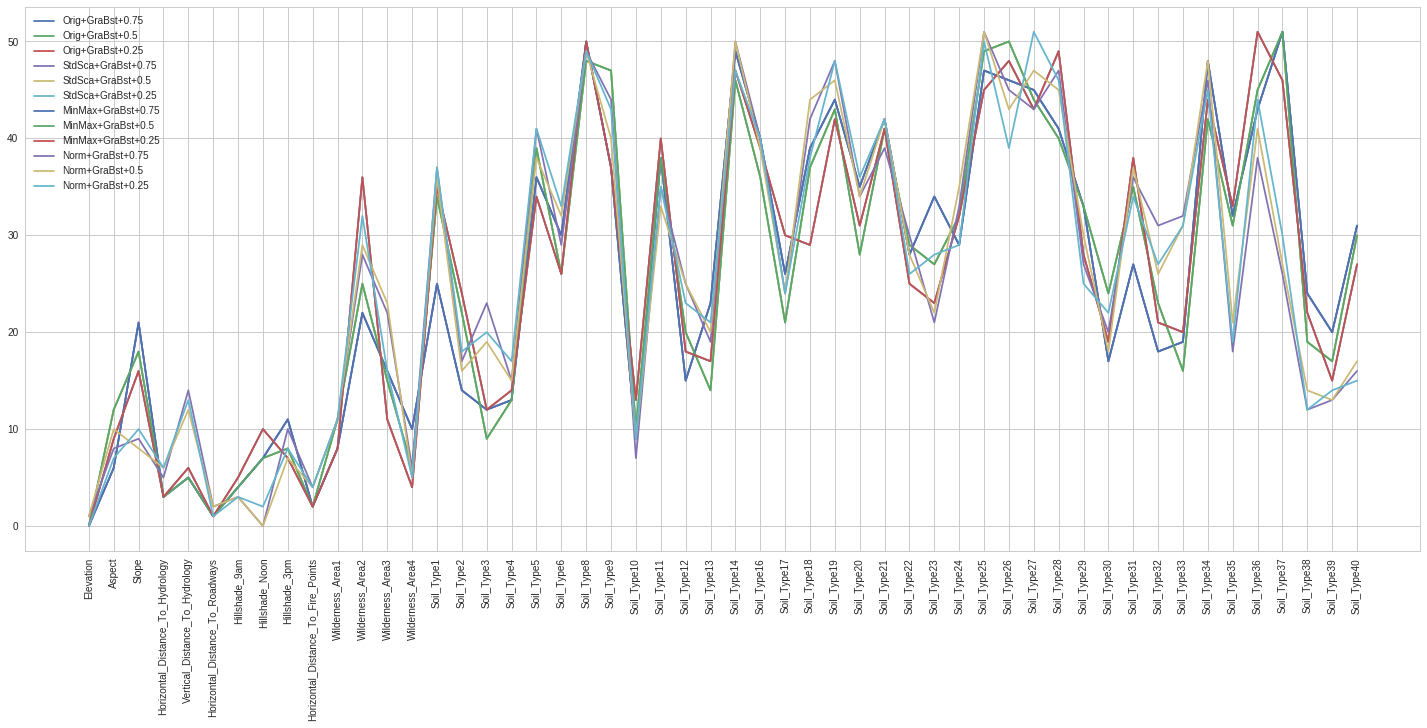

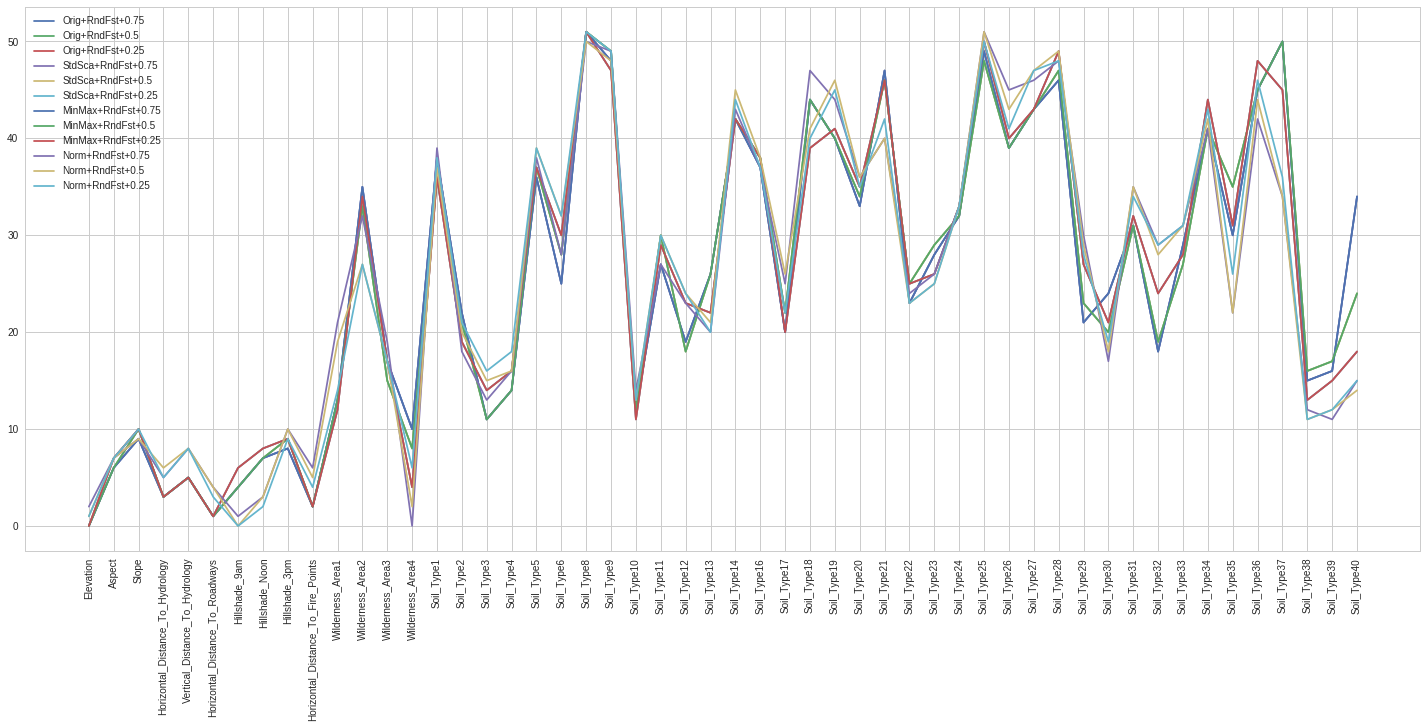

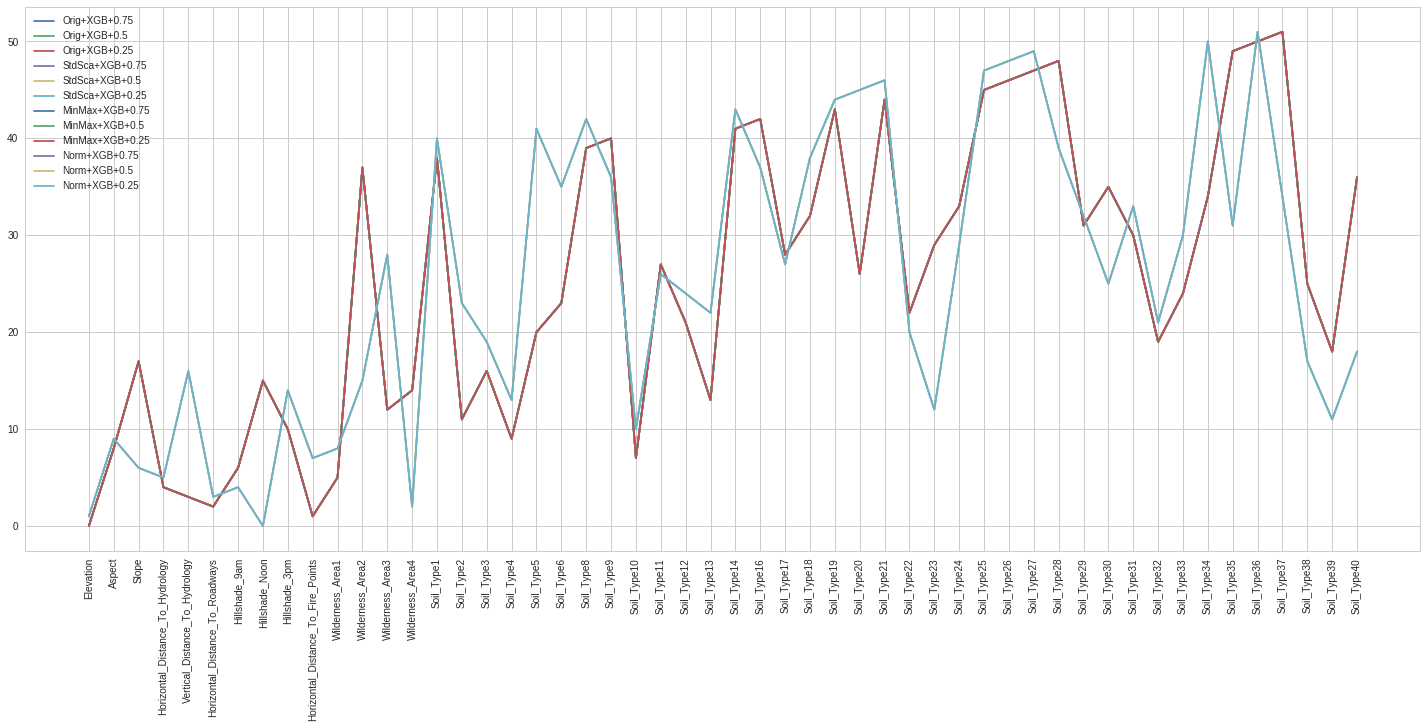

In [37]:
#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot a graph for different feature selectors        
for f_name in feat_list:
    #Array to store the list of combinations
    leg=[]
    fig, ax = plt.subplots()
    #Plot each combination
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        # rank_list是第一个特征到最后一个特征的重要程度排名
        if(name == f_name):
            plt.plot(rank_list)
            leg.append(trans+"+"+name+"+%s" % v)
    #Set the tick names to names of columns
    ax.set_xticks(range(c-1))
    ax.set_xticklabels(cols[:c-1],rotation='vertical')
    #Display the plot
    plt.legend(leg,loc='best')    
    #Plot the rankings of all the features for all combinations
    plt.show()

In [38]:
#List of feature selection models
feat = []

#List of names of feature selection models
feat_list =[]

#Libraries for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Add RFE to the list 
model = LogisticRegression(random_state=seed,n_jobs=-1)
n = 'RFE'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,RFE(model,val*(c-1))])   
        
#For all transformations of X
for trans, s, X, X_val, d, cols, rem, ra, i_cols, i_rem in X_all:
    #For all feature selection models
    for name, v, model in feat:
        #Train the model against Y
        model.fit(X,Y_train)
        #Combine importance and index of the column in the array joined
        joined = []
        for i, pred in enumerate(list(model.ranking_)):
            joined.append([i,cols[i],pred])
        #Sort in ascending order    
        joined_sorted = sorted(joined, key=lambda x: x[2])
        #Starting point of the columns to be dropped
        rem_start = int((v*(c-1)))
        #List of names of columns selected
        cols_list = []
        #Indexes of columns selected
        i_cols_list = []
        #Ranking of all the columns
        rank_list =[]
        #List of columns not selected
        rem_list = []
        #Indexes of columns not selected
        i_rem_list = []
        #Split the array. Store selected columns in cols_list and removed in rem_list
        for i, col, j in joined_sorted:
            #Store the rank
            rank_list.append([i,j-1])
            #Store selected columns in cols_list and indexes in i_cols_list
            if((j-1) < rem_start):
                cols_list.append(col)
                i_cols_list.append(i)
            #Store not selected columns in rem_list and indexes in i_rem_list    
            else:
                rem_list.append(col)
                i_rem_list.append(i)    
        #Sort the rank_list and store only the ranks. Drop the index 
        #Append model name, array, columns selected and columns to be removed to the additional list        
        X_all_add.append([trans,name,X,X_val,v,cols_list,rem_list,[x[1] for x in sorted(rank_list,key=lambda x:x[0])],i_cols_list,i_rem_list]) 

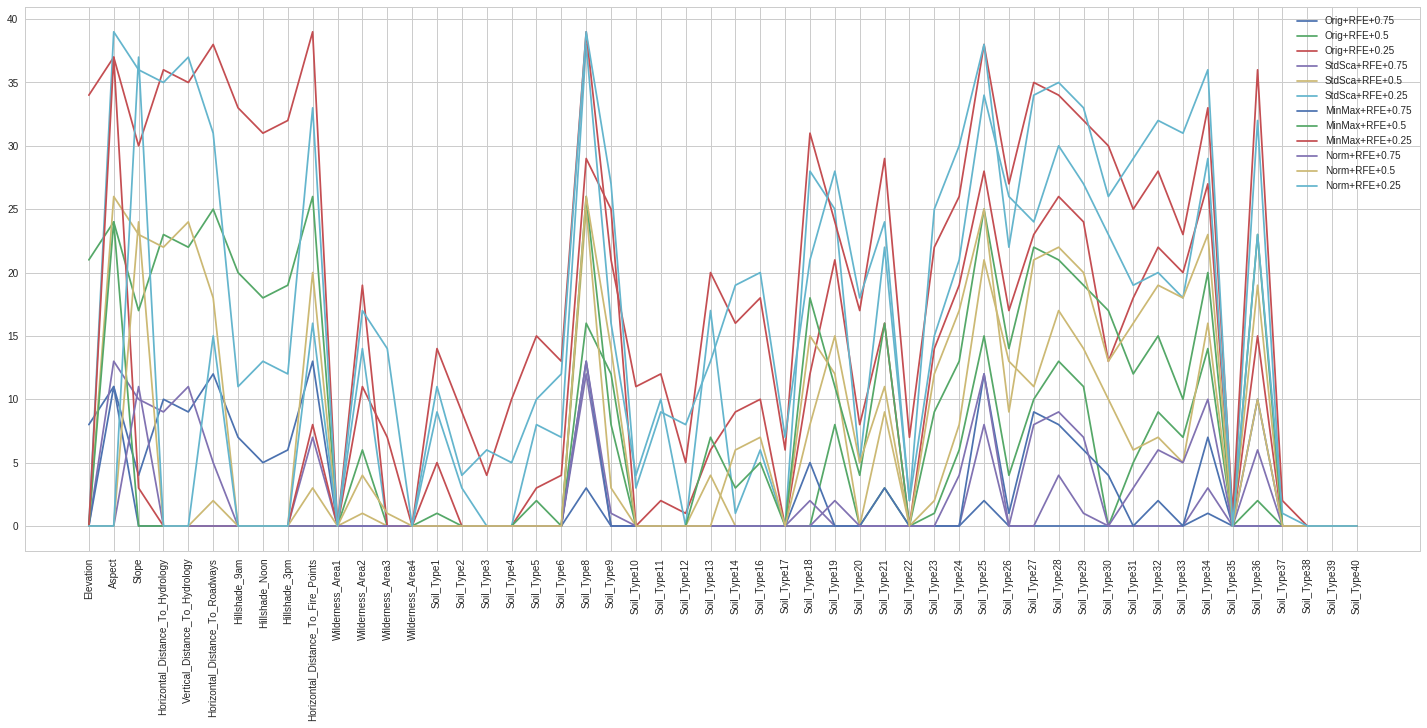

In [39]:
#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot a graph for different feature selectors        
for f_name in feat_list:
    #Array to store the list of combinations
    leg = []
    fig, ax = plt.subplots()
    #Plot each combination
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        if(name == f_name):
            plt.plot(rank_list)
            leg.append(trans+"+"+name+"+%s"% v)
    #Set the tick names to names of columns
    ax.set_xticks(range(c-1))
    ax.set_xticklabels(cols[:c-1],rotation='vertical')
    #Display the plot
    plt.legend(leg,loc='best')    
    #Plot the rankings of all the features for all combinations
    plt.show()

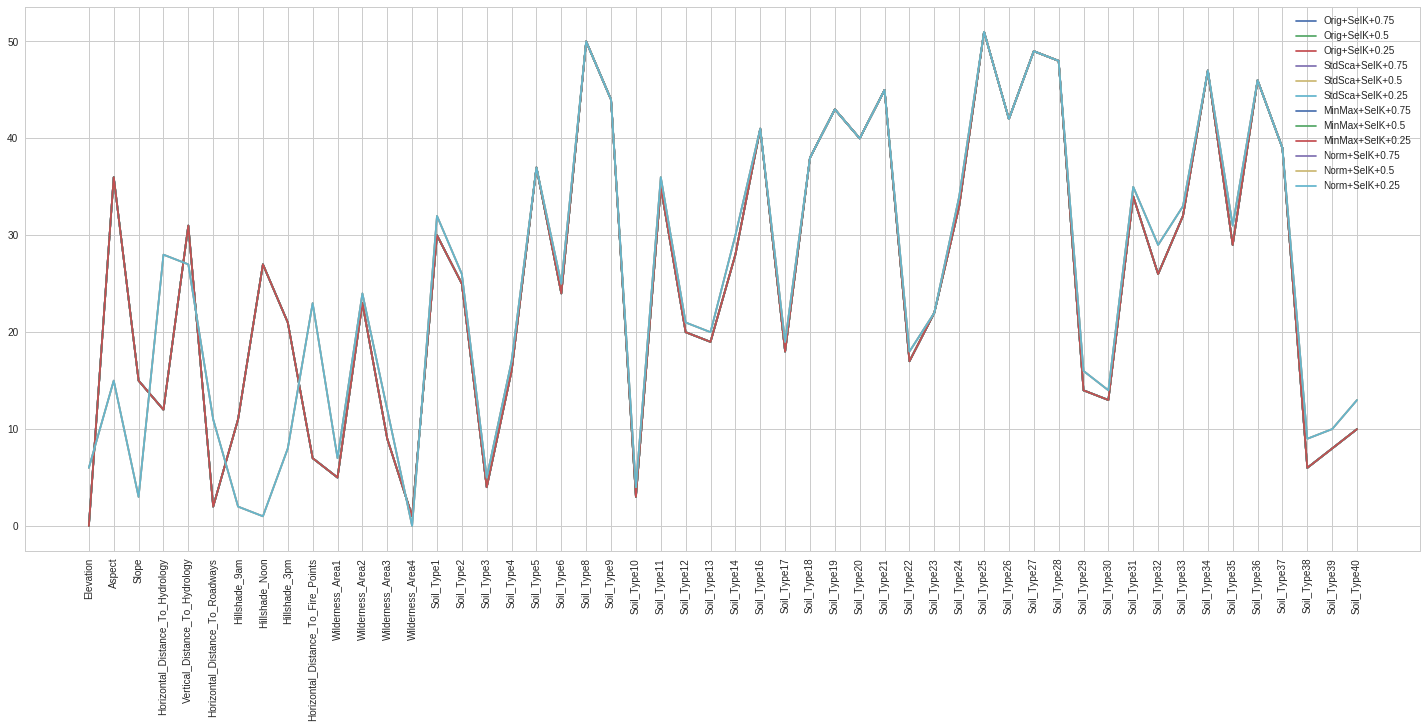

In [40]:
#List of feature selection models
feat = []

#List of names of feature selection models
feat_list =[]

#Libraries for SelectPercentile    
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif        

n = 'SelK'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,SelectPercentile(score_func=f_classif,percentile=val*100)])   

#For all transformations of X
for trans, s, X, X_val, d, cols, rem, ra, i_cols, i_rem in X_all:
    #For all feature selection models
    for name, v, model in feat:
        #Train the model against Y
        model.fit(X,Y_train)
        #Combine importance and index of the column in the array joined
        joined = []
        for i, pred in enumerate(list(model.scores_)):
            joined.append([i,cols[i],pred])
        #Sort in descending order    
        joined_sorted = sorted(joined, key=lambda x: -x[2])
        #Starting point of the columns to be dropped
        rem_start = int((v*(c-1)))
        #List of names of columns selected
        cols_list = []
        #Indexes of columns selected
        i_cols_list = []
        #Ranking of all the columns
        rank_list =[]
        #List of columns not selected
        rem_list = []
        #Indexes of columns not selected
        i_rem_list = []
        #Split the array. Store selected columns in cols_list and removed in rem_list
        for j, (i, col, x) in enumerate(list(joined_sorted)):
            #Store the rank
            rank_list.append([i,j])
            #Store selected columns in cols_list and indexes in i_cols_list
            if(j < rem_start):
                cols_list.append(col)
                i_cols_list.append(i)
            #Store not selected columns in rem_list and indexes in i_rem_list    
            else:
                rem_list.append(col)
                i_rem_list.append(i)    
        #Sort the rank_list and store only the ranks. Drop the index 
        #Append model name, array, columns selected and columns to be removed to the additional list        
        X_all_add.append([trans,name,X,X_val,v,cols_list,rem_list,[x[1] for x in sorted(rank_list,key=lambda x:x[0])],i_cols_list,i_rem_list])    


#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot a graph for different feature selectors        
for f_name in feat_list:
    #Array to store the list of combinations
    leg=[]
    fig, ax = plt.subplots()
    #Plot each combination
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        if(name==f_name):
            plt.plot(rank_list)
            leg.append(trans+"+"+name+"+%s"% v)
    #Set the tick names to names of columns
    ax.set_xticks(range(c-1))
    ax.set_xticklabels(cols[:c-1],rotation='vertical')
    #Display the plot
    plt.legend(leg,loc='best')    
    #Plot the rankings of all the features for all combinations
    plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


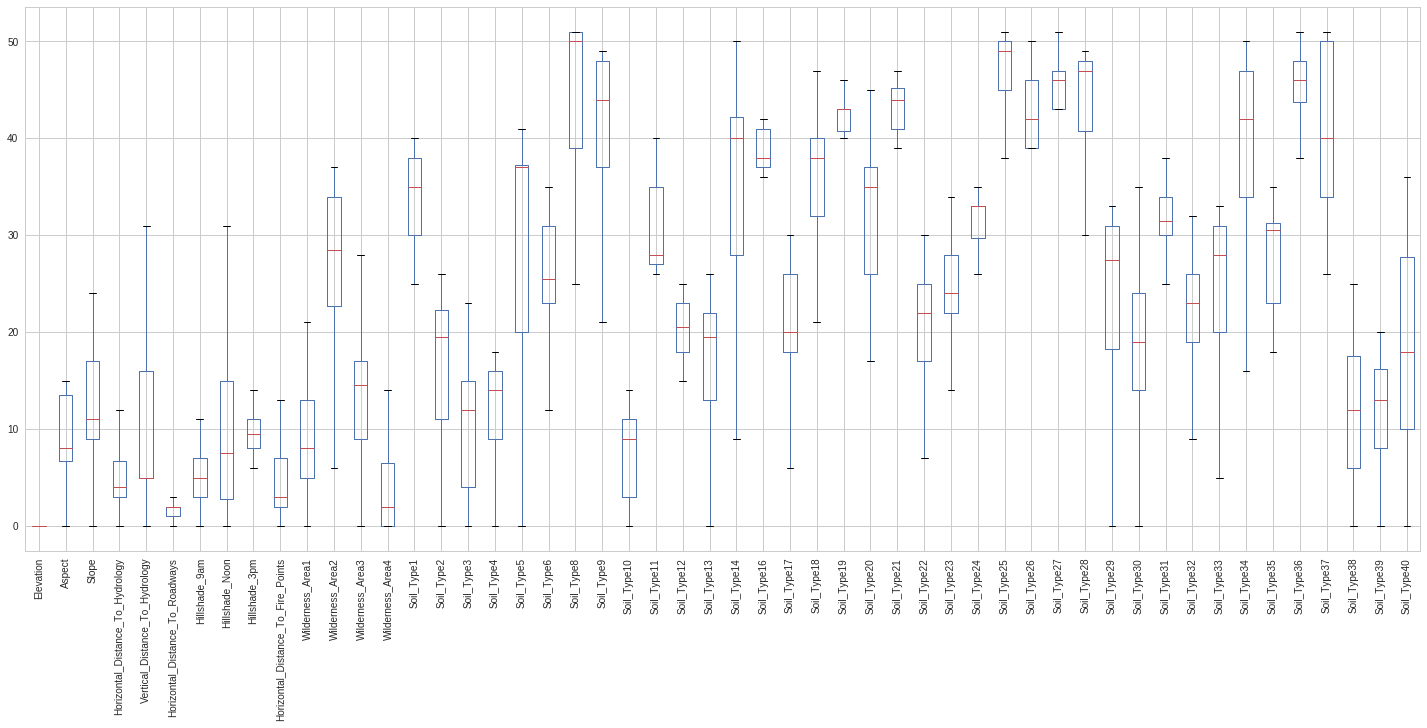

In [41]:
rank_df = pd.DataFrame(data=[x[7] for x in X_all_add],columns=cols[:c-1])
_ = rank_df.boxplot(rot=90)
#Below plot summarizes the rankings according to the standard feature selection techniques
#Top ranked attributes are ... first 10 attributes, Wilderness_Area1,4 ...Soil_Type 3,4,10,38-40

In [42]:
med = rank_df.median()
print med
#Write medians to output file for exploratory study on ML algorithms
with open("median.csv", "w") as subfile:
       subfile.write("Column,Median\n")
       subfile.write(med.to_string())

Elevation                              0.0
Aspect                                 8.0
Slope                                 11.0
Horizontal_Distance_To_Hydrology       4.0
Vertical_Distance_To_Hydrology         5.0
Horizontal_Distance_To_Roadways        2.0
Hillshade_9am                          5.0
Hillshade_Noon                         7.5
Hillshade_3pm                          9.5
Horizontal_Distance_To_Fire_Points     3.0
Wilderness_Area1                       8.0
Wilderness_Area2                      28.5
Wilderness_Area3                      14.5
Wilderness_Area4                       2.0
Soil_Type1                            35.0
Soil_Type2                            19.5
Soil_Type3                            12.0
Soil_Type4                            14.0
Soil_Type5                            37.0
Soil_Type6                            25.5
Soil_Type8                            50.0
Soil_Type9                            44.0
Soil_Type10                            9.0
Soil_Type11

In [43]:
#Select top 75%,50%,25%
ratio_list = [0.75,0.50,0.25]

#Median of rankings for each column
unsorted_rank = [0,8,11,4,5,2,5,7.5,9.5,3,8,28.5,14.5,2,35,19.5,12,14,37,25.5,50,44,9,28,20.5,19.5,40,38,20,38,43,35,44,22,24,33,49,42,46,47,27.5,19,31.5,23,28,42,30.5,46,40,12,13,18]

In [44]:
feat = []

n = "Median"
for val in ratio_list:
    feat.append([n, val])
    

In [45]:
for trans, s, X, X_val, d, cols, rem_cols, ra, i_cols, i_rem in X_all:
    #Create subsets of feature list based on ranking and ratio_list
    for name, v in feat:
        #Combine importance and index of the column in the array joined
        joined = []
        for i, pred in enumerate(unsorted_rank):
            joined.append([i,cols[i],pred])
        #Sort in descending order    
        joined_sorted = sorted(joined, key=lambda x: x[2])
        #Starting point of the columns to be dropped
        rem_start = int((v*(c-1)))
        #List of names of columns selected
        cols_list = []
        #Indexes of columns selected
        i_cols_list = []
        #Ranking of all the columns
        rank_list =[]
        #List of columns not selected
        rem_list = []
        #Indexes of columns not selected
        i_rem_list = []
        #Split the array. Store selected columns in cols_list and removed in rem_list
        for j, (i, col, x) in enumerate(list(joined_sorted)):
            #Store the rank
            rank_list.append([i,j])
            #Store selected columns in cols_list and indexes in i_cols_list
            if(j < rem_start):
                cols_list.append(col)
                i_cols_list.append(i)
            #Store not selected columns in rem_list and indexes in i_rem_list    
            else:
                rem_list.append(col)
                i_rem_list.append(i)    
        #Sort the rank_list and store only the ranks. Drop the index 
        #Append model name, array, columns selected and columns to be removed to the additional list        
        X_all_add.append([trans,name,X,X_val,v,cols_list,rem_list,[x[1] for x in sorted(rank_list,key=lambda x:x[0])],i_cols_list,i_rem_list])

In [46]:
#Dictionary to store the accuracies for all combinations 
acc = {}

#List of combinations
comb = []

#Append name of transformation to trans_list
for trans in trans_list:
    acc[trans]=[]

# Start analysis

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [48]:
model = LinearDiscriminantAnalysis()
algo = 'LDA'

for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
    model.fit(X[:, i_cols_list], Y_train)
    result = model.score(X_val[:, i_cols_list], Y_val)
    acc[trans].append(result)

comb.append("%s+%s of %s" % (algo, "ALL", 1.0))    

/usr/local/lib/python2.7/dist-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [50]:
for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
    model.fit(X[:, i_cols_list], Y_train)
    result = model.score(X_val[:, i_cols_list], Y_val)
    acc[trans].append(result)
for v in ratio_list:
    comb.append("%s+%s of %s" % (algo,"Subset",v))

In [51]:
comb

['LDA+ALL of 1.0',
 'LDA+Subset of 0.75',
 'LDA+Subset of 0.5',
 'LDA+Subset of 0.25']

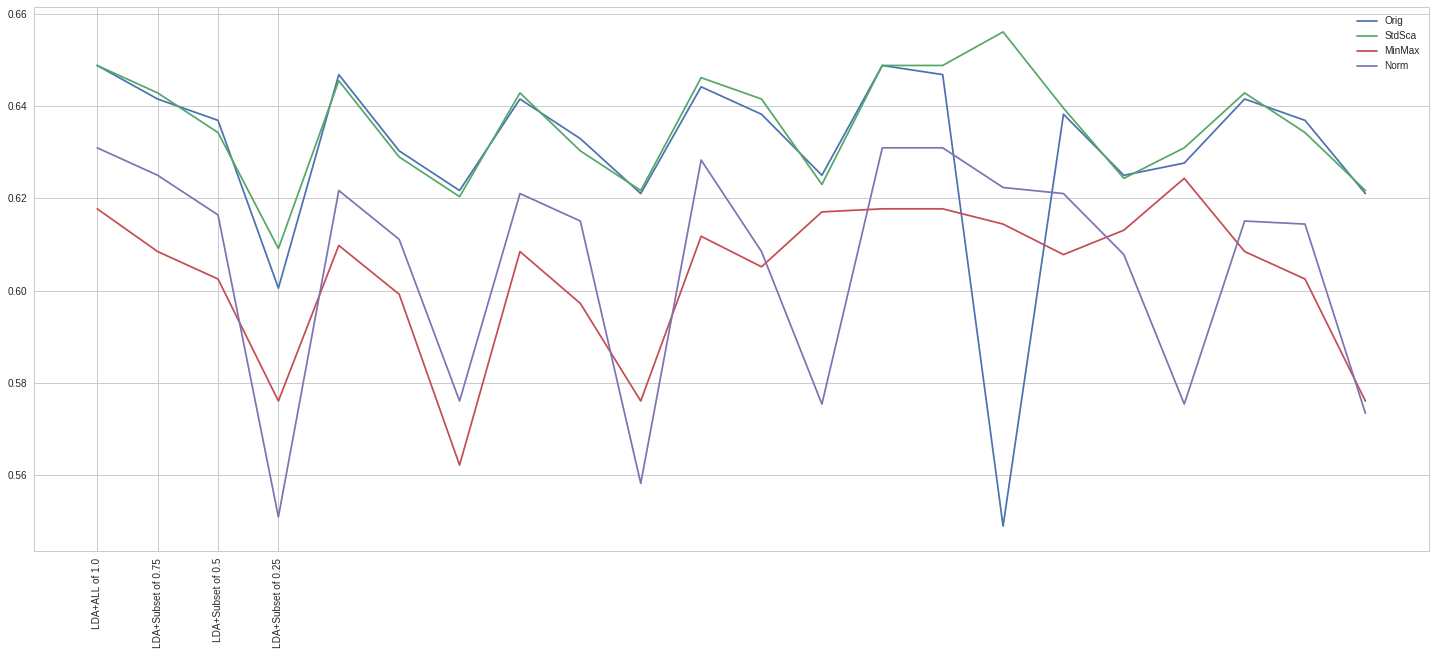

In [52]:
#Plot the accuracies of all combinations
fig, ax = plt.subplots()
#Plot each transformation
for trans in trans_list:
    plt.plot(acc[trans])
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Display the plot
plt.legend(trans_list,loc='best')    
#Plot the accuracy for all combinations
plt.show()    


In [56]:
from sklearn.linear_model import LogisticRegression
C_list = [100]

for C in C_list:
    model = LogisticRegression(n_jobs=-1, random_state=seed, C=C)
    algo = "LR"
    
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model.fit(X[:,i_cols_list], Y_train)
        result = model.score(X_val[:, i_cols_list], Y_val)
        acc[trans].append(result)
        print(trans+"+"+name+"+%d" % (v*(c-1)))
        print(result)
    
    comb.append("%s with C=%s+%s of %s" % (algo, C, "All", 1.0))
    
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        
        print(trans+"+"+name+"+%d" % (v*(c-1)))
        print(result)
        
    for v in ratio_list:
        comb.append("%s with C=%s+%s of %s" % (algo,C,"Subset",v))


Orig+All+52
0.652116402116
StdSca+All+52
0.671957671958
MinMax+All+52
0.621031746032
Norm+All+52
0.658068783069
Orig+ExTree+39
0.652777777778
Orig+ExTree+26
0.643518518519
Orig+ExTree+13
0.578703703704
Orig+GraBst+39
0.655423280423
Orig+GraBst+26
0.634259259259
Orig+GraBst+13
0.562169312169
Orig+RndFst+39
0.650793650794
Orig+RndFst+26
0.641534391534
Orig+RndFst+13
0.595899470899
Orig+XGB+39
0.659391534392
Orig+XGB+26
0.634259259259
Orig+XGB+13
0.581349206349
StdSca+ExTree+39
0.662698412698
StdSca+ExTree+26
0.650793650794
StdSca+ExTree+13
0.595238095238
StdSca+GraBst+39
0.660714285714
StdSca+GraBst+26
0.642857142857
StdSca+GraBst+13
0.600529100529
StdSca+RndFst+39
0.662698412698
StdSca+RndFst+26
0.645502645503
StdSca+RndFst+13
0.591931216931
StdSca+XGB+39
0.660052910053
StdSca+XGB+26
0.644841269841
StdSca+XGB+13
0.611772486772
MinMax+ExTree+39
0.614417989418
MinMax+ExTree+26
0.597222222222
MinMax+ExTree+13
0.547619047619
MinMax+GraBst+39
0.614417989418
MinMax+GraBst+26
0.590608465608
Mi

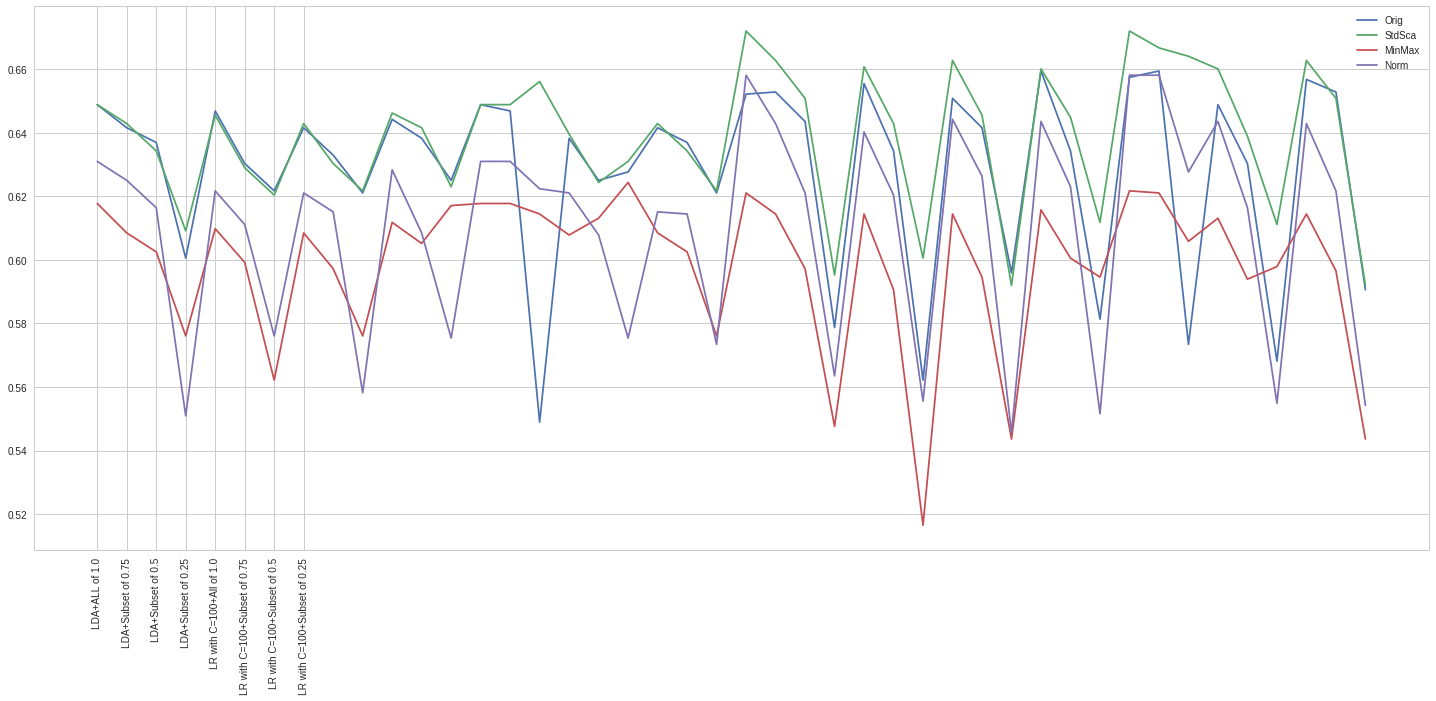

In [57]:
#Plot the accuracies of all combinations
fig, ax = plt.subplots()
#Plot each transformation
for trans in trans_list:
       plt.plot(acc[trans])
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Display the plot
plt.legend(trans_list,loc='best')    
#Plot the accuracy for all combinations
plt.show()    
      
#Best estimated performance is close to 67% with LR when C=100 and all attributes are considered and with standardized data
#Performance improves will increasing value of C
#Performance of Normalizer and MinMax Scaler is poor in general

In [63]:
from sklearn.neighbors import KNeighborsClassifier

n_list = [1]

for n_neighbors in n_list:
    #Set the base model
    model = KNeighborsClassifier(n_jobs=-1,n_neighbors=n_neighbors)
    
    algo = "KNN"
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        print(trans+"+"+name+"+%d" % (v*(c-1)))
        print(result)
    comb.append("%s with n=%s+%s of %s" % (algo,n_neighbors,"All",1.0))
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        print(trans+"+"+name+"+%d" % (v*(c-1)))
        print(result)
    for v in ratio_list:
        comb.append("%s with n=%s+%s of %s" % (algo,n_neighbors,"Subset",v))

Orig+All+52
0.842592592593
StdSca+All+52
0.816137566138
MinMax+All+52
0.775793650794
Norm+All+52
0.850529100529
Orig+ExTree+39
0.842592592593
Orig+ExTree+26
0.842592592593
Orig+ExTree+13
0.842592592593
Orig+GraBst+39
0.842592592593
Orig+GraBst+26
0.842592592593
Orig+GraBst+13
0.841931216931
Orig+RndFst+39
0.842592592593
Orig+RndFst+26
0.842592592593
Orig+RndFst+13
0.842592592593
Orig+XGB+39
0.842592592593
Orig+XGB+26
0.842592592593
Orig+XGB+13
0.843253968254
StdSca+ExTree+39
0.815476190476
StdSca+ExTree+26
0.812830687831
StdSca+ExTree+13
0.774470899471
StdSca+GraBst+39
0.816137566138
StdSca+GraBst+26
0.813492063492
StdSca+GraBst+13
0.793650793651
StdSca+RndFst+39
0.815476190476
StdSca+RndFst+26
0.806878306878
StdSca+RndFst+13
0.790343915344
StdSca+XGB+39
0.816137566138
StdSca+XGB+26
0.811507936508
StdSca+XGB+13
0.81746031746
MinMax+ExTree+39
0.775132275132
MinMax+ExTree+26
0.771164021164
MinMax+ExTree+13
0.73544973545
MinMax+GraBst+39
0.776455026455
MinMax+GraBst+26
0.768518518519
MinM

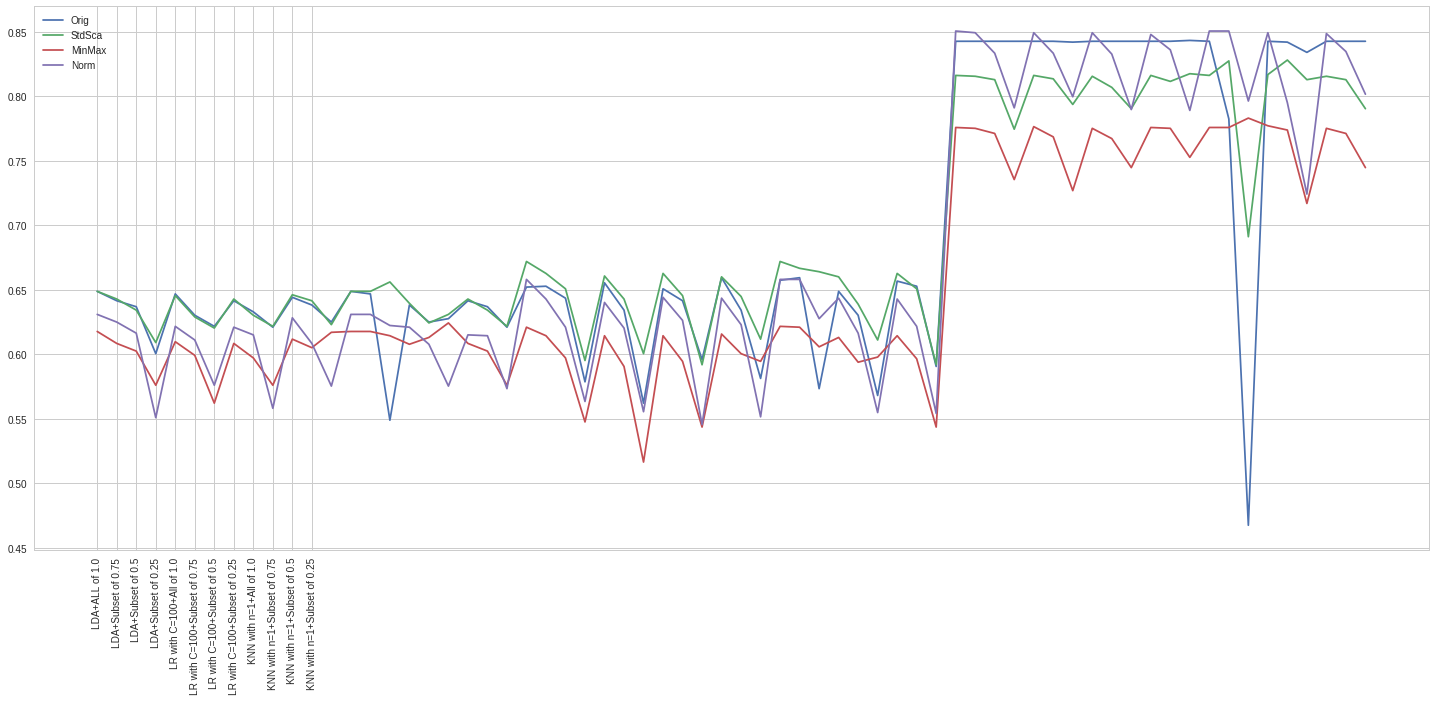

In [59]:
#Plot the accuracies of all combinations
fig, ax = plt.subplots()
#Plot each transformation
for trans in trans_list:
       plt.plot(acc[trans])
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Display the plot
plt.legend(trans_list,loc='best')    
#Plot the accuracy for all combinations
plt.show()    
 
#Best estimated performance is close to 86% when n_neighbors=1 and normalizer is used

In [67]:
#Evaluation of various combinations of Naive Bayes using all the views

#Import the library
from sklearn.naive_bayes import GaussianNB

#Set the base model
model = GaussianNB()
algo = "NB"

##Set figure size
#plt.rc("figure", figsize=(25, 10))

#Accuracy of the model using all features
for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
    model.fit(X[:,i_cols_list],Y_train)
    result = model.score(X_val[:,i_cols_list], Y_val)
    acc[trans].append(result)
    print(trans+"+"+name+"+%d" % (v*(c-1)))
    print(result)
comb.append("%s+%s of %s" % (algo,"All",1.0))
        
#Accuracy of the model using a subset of features    
for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
    model.fit(X[:,i_cols_list],Y_train)
    result = model.score(X_val[:,i_cols_list], Y_val)
    acc[trans].append(result)
    print(trans+"+"+name+"+%d" % (v*(c-1)))
    print(result)
for v in ratio_list:
    comb.append("%s+%s of %s" % (algo,"Subset",v))
    
##Plot the accuracies of all combinations
#fig, ax = plt.subplots()
##Plot each transformation
#for trans in trans_list:
#        plt.plot(acc[trans])
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Display the plot
#plt.legend(trans_list,loc='best')    
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is close to 64%. Original with 50% subset outperfoms all transformations of NB

Orig+All+52
0.595238095238
StdSca+All+52
0.468915343915
MinMax+All+52
0.467592592593
Norm+All+52
0.449735449735
Orig+ExTree+39
0.59126984127
Orig+ExTree+26
0.596560846561
Orig+ExTree+13
0.598544973545
Orig+GraBst+39
0.587962962963
Orig+GraBst+26
0.550925925926
Orig+GraBst+13
0.556216931217
Orig+RndFst+39
0.59126984127
Orig+RndFst+26
0.619708994709
Orig+RndFst+13
0.578703703704
Orig+XGB+39
0.58664021164
Orig+XGB+26
0.568783068783
Orig+XGB+13
0.573412698413
StdSca+ExTree+39
0.472883597884
StdSca+ExTree+26
0.494047619048
StdSca+ExTree+13
0.457010582011
StdSca+GraBst+39
0.469576719577
StdSca+GraBst+26
0.431878306878
StdSca+GraBst+13
0.487433862434
StdSca+RndFst+39
0.472883597884
StdSca+RndFst+26
0.46626984127
StdSca+RndFst+13
0.462962962963
StdSca+XGB+39
0.440476190476
StdSca+XGB+26
0.454365079365
StdSca+XGB+13
0.407407407407
MinMax+ExTree+39
0.474206349206
MinMax+ExTree+26
0.490740740741
MinMax+ExTree+13
0.462301587302
MinMax+GraBst+39
0.472222222222
MinMax+GraBst+26
0.430555555556
MinMax

In [69]:
#Evaluation of various combinations of CART using all the views

#Import the library
from sklearn.tree import DecisionTreeClassifier

d_list = [13]

for max_depth in d_list:
    #Set the base model
    model = DecisionTreeClassifier(random_state=seed,max_depth=max_depth)
   
    algo = "CART"

    #Set figure size
    plt.rc("figure", figsize=(15, 10))

    #Accuracy of the model using all features
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        print(trans+"+"+name+"+%d" % (v*(c-1)))
        print(result)
    comb.append("%s with d=%s+%s of %s" % (algo,max_depth,"All",1.0))

    #Accuracy of the model using a subset of features    
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        print(trans+"+"+name+"+%d" % (v*(c-1)))
        print(result)
    for v in ratio_list:
        comb.append("%s with d=%s+%s of %s" % (algo,max_depth,"Subset",v))
    
##Plot the accuracies of all combinations
#fig, ax = plt.subplots()
##Plot each transformation
#for trans in trans_list:
#        plt.plot(acc[trans])
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Display the plot
#plt.legend(trans_list,loc='best')    
##Plot the accuracy for all combinations
#plt.show()    
    
#Best estimated performance is close to 79% when max_depth=13 and for Original

Orig+All+52
0.778439153439
StdSca+All+52
0.769841269841
MinMax+All+52
0.722883597884
Norm+All+52
0.696428571429
Orig+ExTree+39
0.781084656085
Orig+ExTree+26
0.767857142857
Orig+ExTree+13
0.74537037037
Orig+GraBst+39
0.772486772487
Orig+GraBst+26
0.775132275132
Orig+GraBst+13
0.750661375661
Orig+RndFst+39
0.78373015873
Orig+RndFst+26
0.769841269841
Orig+RndFst+13
0.753306878307
Orig+XGB+39
0.771164021164
Orig+XGB+26
0.781746031746
Orig+XGB+13
0.751984126984
StdSca+ExTree+39
0.773148148148
StdSca+ExTree+26
0.759259259259
StdSca+ExTree+13
0.72619047619
StdSca+GraBst+39
0.768518518519
StdSca+GraBst+26
0.765873015873
StdSca+GraBst+13
0.738095238095
StdSca+RndFst+39
0.776455026455
StdSca+RndFst+26
0.759259259259
StdSca+RndFst+13
0.73082010582
StdSca+XGB+39
0.767857142857
StdSca+XGB+26
0.772486772487
StdSca+XGB+13
0.746693121693
MinMax+ExTree+39
0.719576719577
MinMax+ExTree+26
0.709656084656
MinMax+ExTree+13
0.701058201058
MinMax+GraBst+39
0.715608465608
MinMax+GraBst+26
0.728835978836
MinMax

In [71]:
#Evaluation of various combinations of SVM using all the views

#Import the library
from sklearn.svm import SVC

c_list = [10]

for C in c_list:
    #Set the base model
    model = SVC(random_state=seed,C=C)

    algo = "SVM"

    #Set figure size
    #plt.rc("figure", figsize=(15, 10))

    #Accuracy of the model using all features
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        print(trans+"+"+name+"+%d" % (v*(c-1)))
        print(result)
    comb.append("%s with C=%s+%s of %s" % (algo,C,"All",1.0))

    ##Accuracy of the model using a subset of features    
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        print(trans+"+"+name+"+%d" % (v*(c-1)))
        print(result)
    for v in ratio_list:
        comb.append("%s with C=%s+%s of %s" % (algo,C,"Subset",v))
    
##Plot the accuracies of all combinations
#fig, ax = plt.subplots()
##Plot each transformation
#for trans in trans_list:
#        plt.plot(acc[trans])
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Display the plot
#plt.legend(trans_list,loc='best')    
##Plot the accuracy for all combinations
#plt.show()    

#Training time is very high compared to other algos
#Performance is very poor for original. Shows the importance of data transformation
#Best estimated performance is close to 77% when C=10 and for StandardScaler with 0.25 subset

Orig+All+52
0.134259259259
StdSca+All+52
0.765211640212
MinMax+All+52
0.691137566138
Norm+All+52
0.630291005291
Orig+ExTree+39
0.133597883598
Orig+ExTree+26
0.132936507937
Orig+ExTree+13
0.132275132275
Orig+GraBst+39
0.133597883598
Orig+GraBst+26
0.132936507937
Orig+GraBst+13
0.132275132275
Orig+RndFst+39
0.133597883598
Orig+RndFst+26
0.132936507937
Orig+RndFst+13
0.132275132275
Orig+XGB+39
0.133597883598
Orig+XGB+26
0.132936507937
Orig+XGB+13
0.132275132275
StdSca+ExTree+39
0.776455026455
StdSca+ExTree+26
0.770502645503
StdSca+ExTree+13
0.765873015873
StdSca+GraBst+39
0.777116402116
StdSca+GraBst+26
0.773148148148
StdSca+GraBst+13
0.777116402116
StdSca+RndFst+39
0.776455026455
StdSca+RndFst+26
0.777116402116
StdSca+RndFst+13
0.778439153439
StdSca+XGB+39
0.776455026455
StdSca+XGB+26
0.781084656085
StdSca+XGB+13
0.785714285714
MinMax+ExTree+39
0.691798941799
MinMax+ExTree+26
0.683201058201
MinMax+ExTree+13
0.662698412698
MinMax+GraBst+39
0.69246031746
MinMax+GraBst+26
0.683201058201
Min

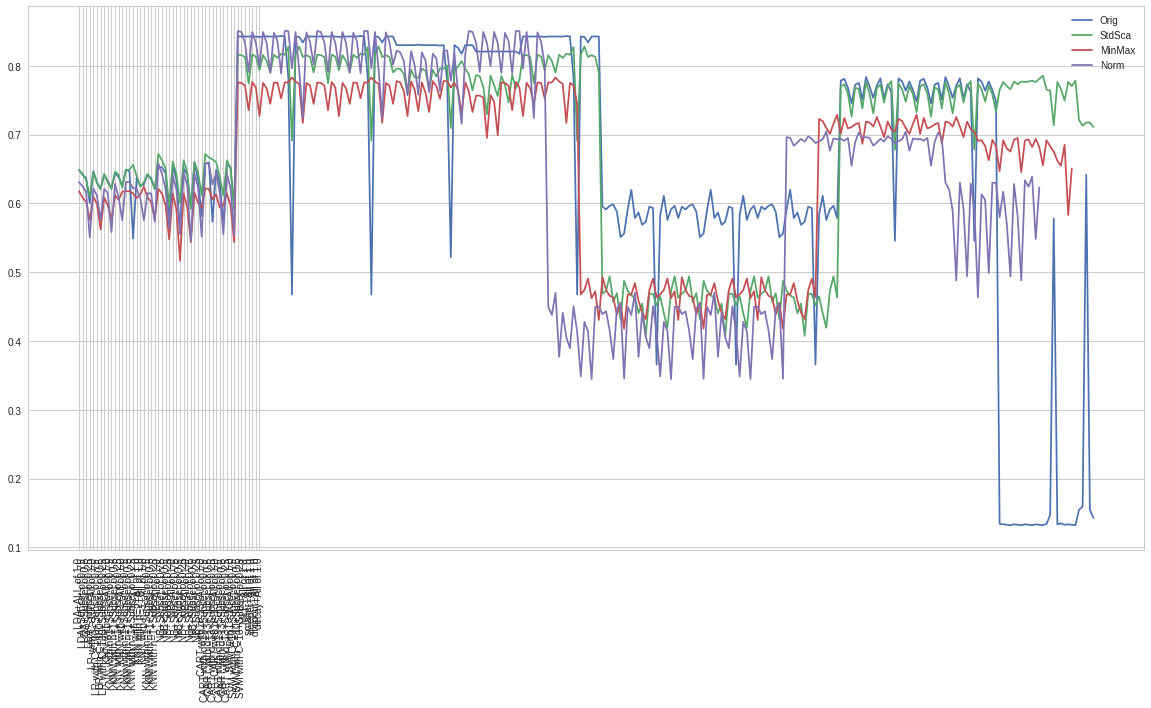

In [74]:
#Evaluation of baseline model of MLP using all the views

#Import libraries for deep learning
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
import numpy
#Import libraries for encoding
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

#no. of output classes
y = 7

#random state
numpy.random.seed(seed)

# one hot encode class values
encoder = LabelEncoder()
Y_train_en = encoder.fit_transform(Y_train)
Y_train_hot = np_utils.to_categorical(Y_train_en,y) 
Y_val_en = encoder.fit_transform(Y_val)
Y_val_hot = np_utils.to_categorical(Y_val_en,y) 


# define baseline model
def baseline(v):
     # create model
    model = Sequential()
    model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu'))
    model.add(Dense(y, init='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# define smaller model
def smaller(v):
    
    # create model
    model = Sequential()
    model.add(Dense(v*(c-1)/2, input_dim=v*(c-1), init='normal', activation='relu'))
    model.add(Dense(y, init='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# define deeper model
def deeper(v):
    
    # create model
    model = Sequential()
    model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu'))
    model.add(Dense(v*(c-1)/2, init='normal', activation='relu'))
    model.add(Dense(y, init='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Optimize using dropout and decay
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm

def dropout(v):
    #create model
    model = Sequential()
    model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu',W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(v*(c-1)/2, init='normal', activation='relu', W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(y, init='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.1,momentum=0.9,decay=0.0,nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# define decay model
def decay(v):
    # create model
    model = Sequential()
    model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu'))
    model.add(Dense(y, init='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.1,momentum=0.8,decay=0.01,nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
    
est_list = [('MLP',baseline),('smaller',smaller),('deeper',deeper),('dropout',dropout),('decay',decay)]

for name, est in est_list:
 
    algo = name

    #Set figure size
    plt.rc("figure", figsize=(20, 10))

    #Accuracy of the model using all features
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model = KerasClassifier(build_fn=est, v=v, nb_epoch=10, verbose=0)
        model.fit(X[:,i_cols_list],Y_train_hot)
        result = model.score(X_val[:,i_cols_list], Y_val_hot)
        acc[trans].append(result)
    #    print(trans+"+"+name+"+%d" % (v*(c-1)))
    #    print(result)
    comb.append("%s+%s of %s" % (algo,"All",1.0))

    ##Accuracy of the model using a subset of features    
    #for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
    #    model = KerasClassifier(build_fn=est, v=v, nb_epoch=10, verbose=0)
    #    model.fit(X[:,i_cols_list],Y_train_hot)
    #    result = model.score(X_val[:,i_cols_list], Y_val_hot)
    #    acc[trans].append(result)
    #    print(trans+"+"+name+"+%d" % (v*(c-1)))
    #    print(result)
    #for v in ratio_list:
    #    comb.append("%s+%s of %s" % (algo,"Subset",v))

#Plot the accuracies of all combinations
fig, ax = plt.subplots()
#Plot each transformation
for trans in trans_list:
        plt.plot(acc[trans])
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Display the plot
plt.legend(trans_list,loc='best')    
#Plot the accuracy for all combinations
plt.show()    

# Best estimated performance is 71% 
# Performance is poor is general. Data transformations make a huge difference.